In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
#import plotly.express as px

#Tiesiog daugiau biblioteku instaliuojama.

In [3]:
#prisijungimas prie mySQL, ir kursoriaus sukūrimas
DB = cnt.connect(
host = '88.223.121.130',
user='user',
password='slaptazodis',
port=3306,
database='works'
)
C=DB.cursor()

In [39]:
# atrinkti 10 populiariausių gamintojų iš autopliuslt,
# pateikti tokius stulpelius - gamintojas, vidutinė kaina, 
# vidutinė rida, vidutinis amžius, modelių kiekis. 
# Gautus rezultatus surašyti į SQLite duomebazę, pavadinimu "Testas.db", lentelės pavadinimas kokį sugalvosite. Viską turi atlikti python kodas.
# PANDAS NEGALIMA NAUDOTI, viską atlikite per cursor() objektus.
#SURASAU VISUS NET TUOS< KURI PATEIKTI NE VISI IRASAI
import sqlite3
import mysql.connector as cnt  # Naudojamas prisijungti prie MySQL duomenų bazės


# 1. Prisijungimas prie MySQL duomenų bazės (autopliuslt)
DB = cnt.connect(
    host='88.223.121.130',
    user='user',
    password='slaptazodis',
    port=3306,
    database='works'  # Jūsų MySQL duomenų bazės pavadinimas
)

# Sukuriame kursorių MySQL duomenų bazėje
C = DB.cursor()

# SQL užklausa duomenims iš MySQL duomenų bazės nuskaityti
sql_query = '''
    SELECT gamintojas, 
           AVG(rida) AS vidutine_rida, 
           AVG(price) AS vidutine_kaina, 
           AVG(2024 - YEAR(pagaminimo_data)) AS vidutinis_amzius,
           COUNT(*) AS modeliu_kiekis
    FROM autopliuslt
    WHERE pagaminimo_data IS NOT NULL
    GROUP BY gamintojas
    ORDER BY modeliu_kiekis DESC
    LIMIT 10
'''

# Vykdome SQL užklausą MySQL duomenų bazėje
C.execute(sql_query)
sql_results = C.fetchall()  # Gauname rezultatus iš MySQL

# 2. Prisijungimas prie SQLite DB (Testas.db)
SDB = sqlite3.connect('Testas.db')
Cs = SDB.cursor()

# Sukuriame naują lentelę „PopAutoGamintojai“, jei ji neegzistuoja
Cs.execute('''
    CREATE TABLE IF NOT EXISTS PopAutoGamintojai (
        gamintojas TEXT NOT NULL,
        vidutine_kaina REAL NOT NULL,
        vidutine_rida REAL,
        vidutinis_amzius REAL,
        modeliu_kiekis INTEGER NOT NULL
    )
''')

# 3. Perkeliame rezultatus iš MySQL į SQLite
insert_query = '''
    INSERT INTO PopAutoGamintojai (gamintojas, vidutine_kaina, vidutine_rida, vidutinis_amzius, modeliu_kiekis)
    VALUES (?, ?, ?, ?, ?)
'''

# Įrašome kiekvieną eilutę iš MySQL rezultatų į SQLite
for row in sql_results:
    Cs.execute(insert_query, row)

# Išsaugome pakeitimus SQLite DB
SDB.commit()

# Uždarome MySQL ir SQLite ryšius
C.close()
DB.close()

Cs.close()
SDB.close()

In [78]:
#https://data.gov.lt/datasets/509/
# pandas ir JSON:

#  https://data.gov.lt/datasets/509/

# nuskaitykite JSON failą -  2023 metus

# konvertuokite dataLaikas stulpelį į datetime
#  pd.to_datetime(df[stulpelis])

# pridėkite naują stulpelį su paros laikais (rytas, vakaras ...)
# pridėkite naują stulplelį, kur būtų tik įvykio valanda

import pandas as pd

# 1. Nuskaitykite JSON failą
file_path = r'C:\Users\eleta\OneDrive\Desktop\Mokslai\DataScienceNotebooks\Studentai\EleTame\ei_2023_12_31.json'
df = pd.read_json(file_path)

# 2. Konvertuokite stulpelį 'dataLaikas' į datetime formatą
df['dataLaikas'] = pd.to_datetime(df['dataLaikas'], errors='coerce')

# 3. Pašalinkime įrašus, kurie neturi laiko informacijos (tik datą)
df = df.dropna(subset=['dataLaikas'])  # Pašaliname NaT reikšmes

# 4. Išskirkite tik valandos dalį ir pridėkite naują stulpelį 'valanda'
df['valanda'] = df['dataLaikas'].dt.hour

# 5. Pataisome laiko intervalų priskyrimo funkciją
def get_time_interval(hour):
    if 4 <= hour < 10:
        return 'Rytas'
    elif 10 <= hour < 17:
        return 'Diena'
    elif 17 <= hour < 22:
        return 'Vakaras'
    else:
        return 'Naktis'

# 6. Pridėkite naują stulpelį 'laikoIntervalas', naudodami funkciją
df['laikoIntervalas'] = df['valanda'].apply(get_time_interval)
for idx, col in enumerate(df.columns):
    print(f"Indeksas: {idx}, Stulpelio pavadinimas: {col}")
# Peržiūrėkite rezultatus
df.tail(2)

Indeksas: 0, Stulpelio pavadinimas: registrokodas
Indeksas: 1, Stulpelio pavadinimas: dataLaikas
Indeksas: 2, Stulpelio pavadinimas: registravimoData
Indeksas: 3, Stulpelio pavadinimas: paskutinioRedagavimoLaikas
Indeksas: 4, Stulpelio pavadinimas: iskaitinis
Indeksas: 5, Stulpelio pavadinimas: rusis
Indeksas: 6, Stulpelio pavadinimas: schema1
Indeksas: 7, Stulpelio pavadinimas: schema2
Indeksas: 8, Stulpelio pavadinimas: dalyviuSkaicius
Indeksas: 9, Stulpelio pavadinimas: zuvusiuSkaicius
Indeksas: 10, Stulpelio pavadinimas: zuvVaiku
Indeksas: 11, Stulpelio pavadinimas: suzeistuSkaicius
Indeksas: 12, Stulpelio pavadinimas: suzeistaVaiku
Indeksas: 13, Stulpelio pavadinimas: tpSkaicius
Indeksas: 14, Stulpelio pavadinimas: policijosTpSkaicius
Indeksas: 15, Stulpelio pavadinimas: apgadintuTpSkaicius
Indeksas: 16, Stulpelio pavadinimas: apgadintuPolicijosTpSkaicius
Indeksas: 17, Stulpelio pavadinimas: policijosIstaigaL1
Indeksas: 18, Stulpelio pavadinimas: policijosIstaigaL2
Indeksas: 19, S

,registrokodas,dataLaikas,registravimoData,paskutinioRedagavimoLaikas,iskaitinis,rusis,schema1,schema2,dalyviuSkaicius,zuvusiuSkaicius,...,leistinasGreitis,neblaivusKaltininkai,apsvaigeKaltininkai,atsisakeTikrintisKaltininkai,ilguma,platuma,eismoDalyviai,eismoTranspPreimone,valanda,laikoIntervalas
24238,07-23-9613410,2023-12-31 22:00:00,2023-12-31 22:40,2024-03-06 11:01,0,Susidūrimas,Susidūrimai judant ta pačia kryptimi,Šoninis susidūrimas,2,0,...,50.0,Ne,Ne,Ne,6061478.0,581565.0,"[{'dalyvisId': 49159858, 'kategorija': 'Automo...","[{'tpId': 33971728, 'regValstybe': 'Lietuva', ...",22,Naktis
24239,07-23-9613411,2023-12-31 19:45:00,2023-12-31 23:34,2024-01-02 16:03,0,Susidūrimas,Susidūrimai judant ta pačia kryptimi,Šoninis susidūrimas,6,0,...,50.0,Ne,Ne,Ne,6186722.0,471778.0,"[{'dalyvisId': 49087861, 'kategorija': 'Keleiv...","[{'tpId': 33933356, 'regValstybe': 'Lietuva', ...",19,Vakaras


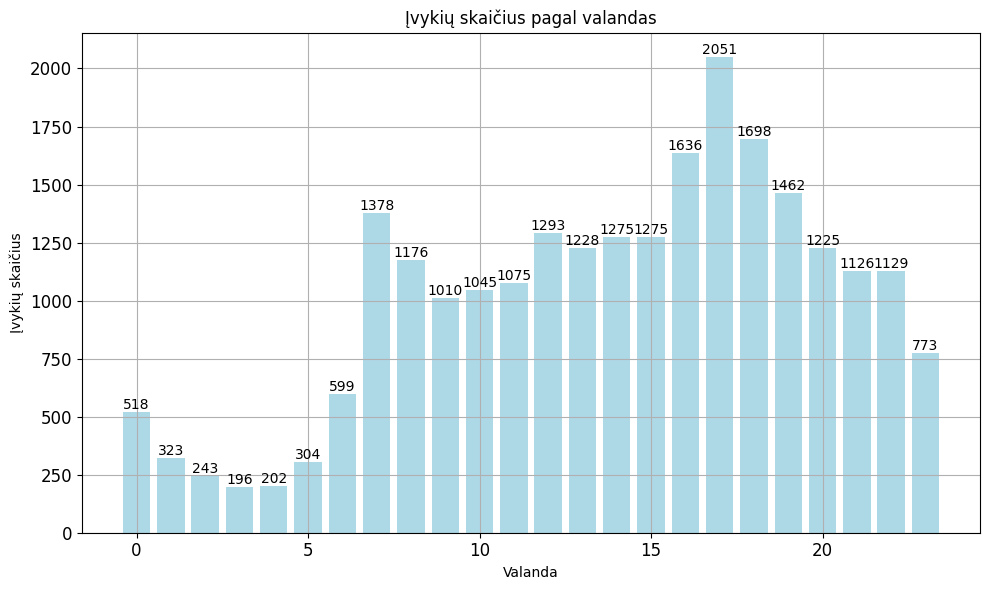

In [67]:
# pandas ir JSON:

#  https://data.gov.lt/datasets/509/

# nuskaitykite JSON failą -  2023 metus

# konvertuokite dataLaikas stulpelį į datetime
#  pd.to_datetime(df[stulpelis])

# pridėkite naują stulpelį su paros laikais (rytas, vakaras ...)
# pridėkite naują stulplelį, kur būtų tik įvykio valanda
# Vizualizuokite, kuriuo paros laiku, kurią valandą įvyksta daugiausiai eismo įvykių
import pandas as pd
import matplotlib.pyplot as plt

# 1. Nuskaitykite JSON failą
file_path = r'C:\Users\eleta\OneDrive\Desktop\Mokslai\DataScienceNotebooks\Studentai\EleTame\ei_2023_12_31.json'
df = pd.read_json(file_path)

# 2. Konvertuokite stulpelį 'dataLaikas' į datetime formatą
df['dataLaikas'] = pd.to_datetime(df['dataLaikas'], errors='coerce')

# 3. Pašalinkime įrašus, kurie neturi laiko informacijos (tik datą)
df = df.dropna(subset=['dataLaikas'])  # Pašaliname NaT reikšmes

# 4. Išskirkite tik valandos dalį ir pridėkite naują stulpelį 'valanda'
df['valanda'] = df['dataLaikas'].dt.hour

# 6. Pridėkite naują stulpelį 'laikoIntervalas', naudodami funkciją
df['laikoIntervalas'] = df['valanda'].apply(get_time_interval)

# 7. Grupavimas pagal valandą, kad būtų galima suskaičiuoti įvykių skaičių
hourly_counts = df.groupby('valanda').size()

# Braižome grafiką
plt.figure(figsize=(10, 6))
bars = plt.bar(hourly_counts.index, hourly_counts.values, color='lightblue')
plt.xlabel('Valanda')
plt.ylabel('Įvykių skaičius')
plt.title('Įvykių skaičius pagal valandas')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Pridėti skaičius virš barų
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), 
             ha='center', va='bottom', fontsize=10)

# Parodome grafiką
plt.tight_layout()
plt.show()

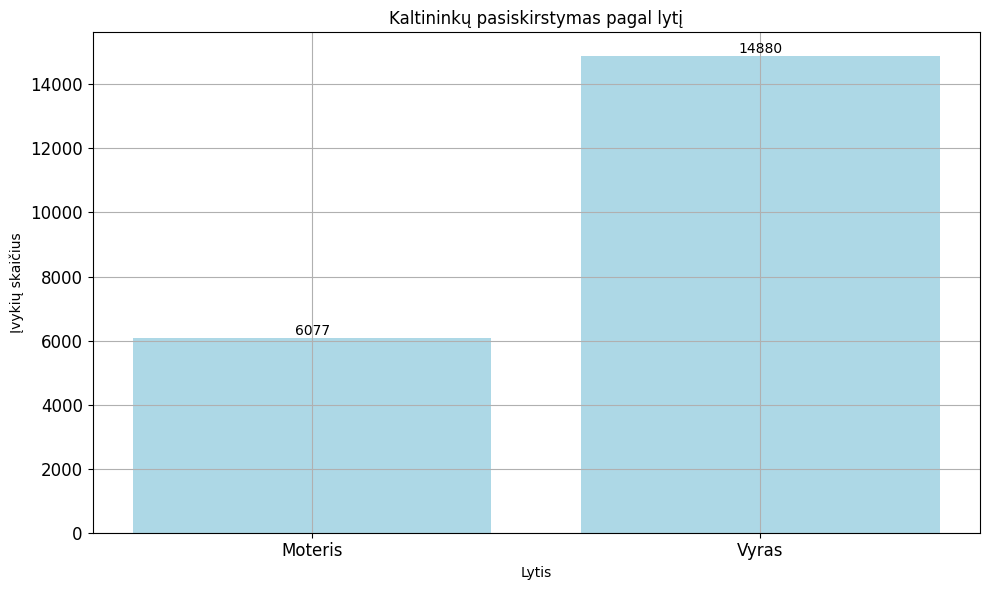

In [70]:
# pandas ir JSON:

#  https://data.gov.lt/datasets/509/

# nuskaitykite JSON failą -  2023 metus

# konvertuokite dataLaikas stulpelį į datetime
#  pd.to_datetime(df[stulpelis])
# sekantiems klausimams patys sugalvojate tinkamiausias vizualizacijas
# Vyrų ar moterų buvo daugiau, sukėlusių eismo įvykį?
import pandas as pd
import matplotlib.pyplot as plt

# 1. Nuskaitykite JSON failą
file_path = r'C:\Users\eleta\OneDrive\Desktop\Mokslai\DataScienceNotebooks\Studentai\EleTame\ei_2023_12_31.json'
df = pd.read_json(file_path)

# 2. Sukuriame pagalbinę funkciją, kad ištrauktume lyties informaciją
def extract_sex(eismo_dalyviai):
    if isinstance(eismo_dalyviai, list) and len(eismo_dalyviai) > 0:
        return eismo_dalyviai[0].get('lytis', None)  # Ištraukiame lytį iš pirmo eismo dalyvio
    return None

# 3. Pridedame naują stulpelį 'lytis', kuriame yra lyties informacija
df['lytis'] = df['eismoDalyviai'].apply(extract_sex)

# 4. Pašalinkime įrašus, kurie neturi lyties informacijos
df = df.dropna(subset=['lytis'])

# 5. Grupavimas pagal lytį, kad būtų galima suskaičiuoti įvykių skaičių
sex_counts = df.groupby('lytis').size()

# 6. Braižome grafiką
plt.figure(figsize=(10, 6))
bars = plt.bar(sex_counts.index, sex_counts.values, color='lightblue')
plt.xlabel('Lytis')
plt.ylabel('Įvykių skaičius')
plt.title('Kaltininkų pasiskirstymas pagal lytį')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Pridėti skaičius virš barų
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), 
             ha='center', va='bottom', fontsize=10)

# Parodome grafiką
plt.tight_layout()
plt.show()

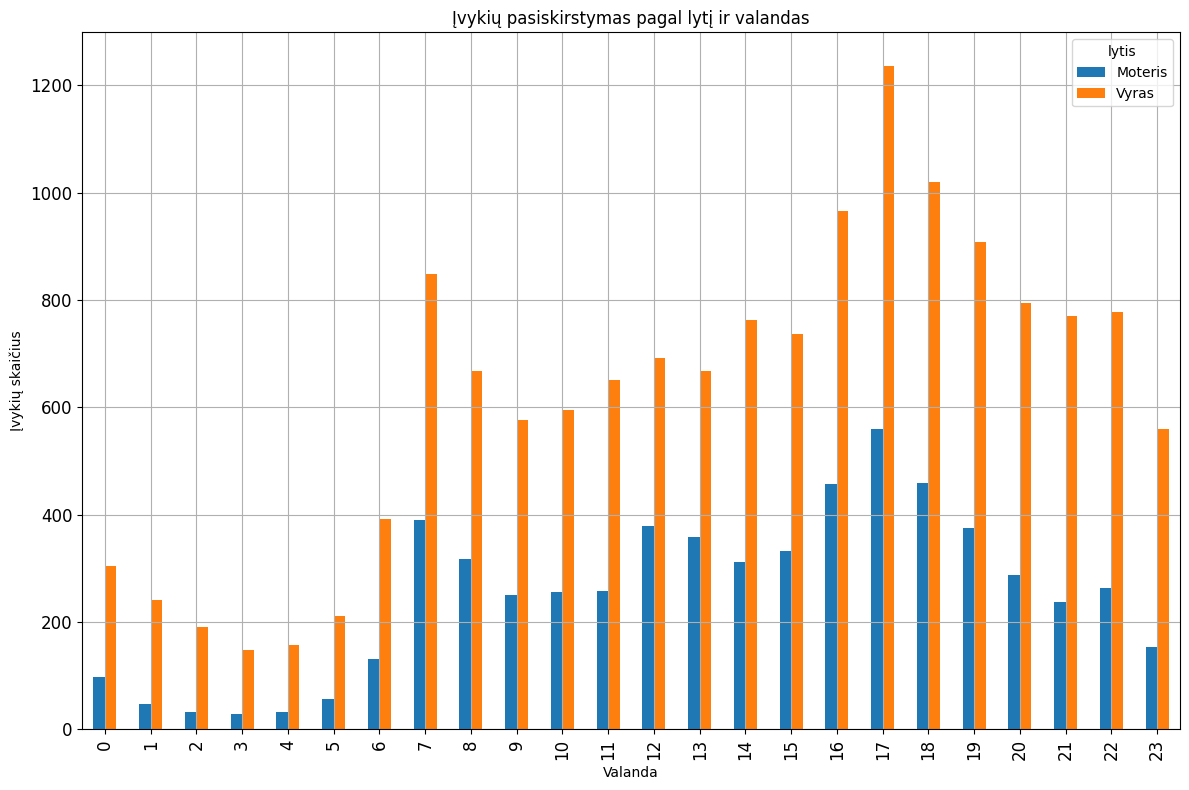

In [74]:
#konvertuokite dataLaikas stulpelį į datetime
#  pd.to_datetime(df[stulpelis])
# sekantiems klausimams patys sugalvojate tinkamiausias vizualizacijas
# Vyrų ar moterų buvo daugiau, sukėlusių eismo įvykį pasiskirstymas pagal valandas
import pandas as pd
import matplotlib.pyplot as plt

# 1. Nuskaitykite JSON failą
file_path = r'C:\Users\eleta\OneDrive\Desktop\Mokslai\DataScienceNotebooks\Studentai\EleTame\ei_2023_12_31.json'
df = pd.read_json(file_path)

# 2. Konvertuokite stulpelį 'dataLaikas' į datetime formatą
df['dataLaikas'] = pd.to_datetime(df['dataLaikas'], errors='coerce')

# 3. Pašalinkime įrašus, kurie neturi laiko informacijos (tik datą)
df = df.dropna(subset=['dataLaikas'])  # Pašaliname NaT reikšmes

# 4. Išskirkite tik valandos dalį ir pridėkite naują stulpelį 'valanda'
df['valanda'] = df['dataLaikas'].dt.hour

# 5. Sukuriame pagalbinę funkciją, kad ištrauktume lyties informaciją
def extract_sex(eismo_dalyviai):
    if isinstance(eismo_dalyviai, list) and len(eismo_dalyviai) > 0:
        return eismo_dalyviai[0].get('lytis', None)  # Ištraukiame lytį iš pirmo eismo dalyvio
    return None

# 6. Pridedame naują stulpelį 'lytis', kuriame yra lyties informacija
df['lytis'] = df['eismoDalyviai'].apply(extract_sex)

# 7. Pašalinkime įrašus, kurie neturi lyties informacijos
df = df.dropna(subset=['lytis'])

# 8. Grupavimas pagal lytį ir valandą, kad būtų galima suskaičiuoti įvykius
grouped = df.groupby(['lytis', 'valanda']).size().unstack()

# 9. Braižome grafiką
grouped.T.plot(kind='bar', figsize=(12, 8))

plt.xlabel('Valanda')
plt.ylabel('Įvykių skaičius')
plt.title('Įvykių pasiskirstymas pagal lytį ir valandas')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Parodome grafiką
plt.tight_layout()
plt.show()

In [4]:
# koks vidutinis kaltininkų amžius?

# 1. Nuskaitykite JSON failą
file_path = r'C:\Users\eleta\OneDrive\Desktop\Mokslai\DataScienceNotebooks\Studentai\EleTame\ei_2023_12_31.json'
df = pd.read_json(file_path)

# 2. Sukuriame pagalbinę funkciją, kad ištrauktume amžiaus informaciją
def extract_age(eismo_dalyviai):
    if isinstance(eismo_dalyviai, list) and len(eismo_dalyviai) > 0:
        return eismo_dalyviai[0].get('amzius', None)  # Ištraukiame amžių iš pirmo eismo dalyvio
    return None

# 3. Pridedame naują stulpelį 'amzius', kuriame yra amžiaus informacija iš eismoDalyviai stulpelio
df['amzius'] = df['eismoDalyviai'].apply(extract_age)

# 4. Pašalinkime įrašus, kurie neturi amžiaus informacijos
df = df.dropna(subset=['amzius'])

# 5. Paverčiame 'amzius' į skaitmeninį formatą (jei reikia)
df['amzius'] = pd.to_numeric(df['amzius'], errors='coerce')

# 6. Skaičiuojame amžiaus vidurkį ir mediana
average_age = df['amzius'].mean()
mediana_age = df['amzius'].median()
print(f"Kaltininkų amžiaus vidurkis yra: {average_age:.2f}")
print(f"Kaltininkų amžiaus median yra: {mediana_age:.2f}")

Kaltininkų amžiaus vidurkis yra: 40.93
Kaltininkų amžiaus median yra: 39.00


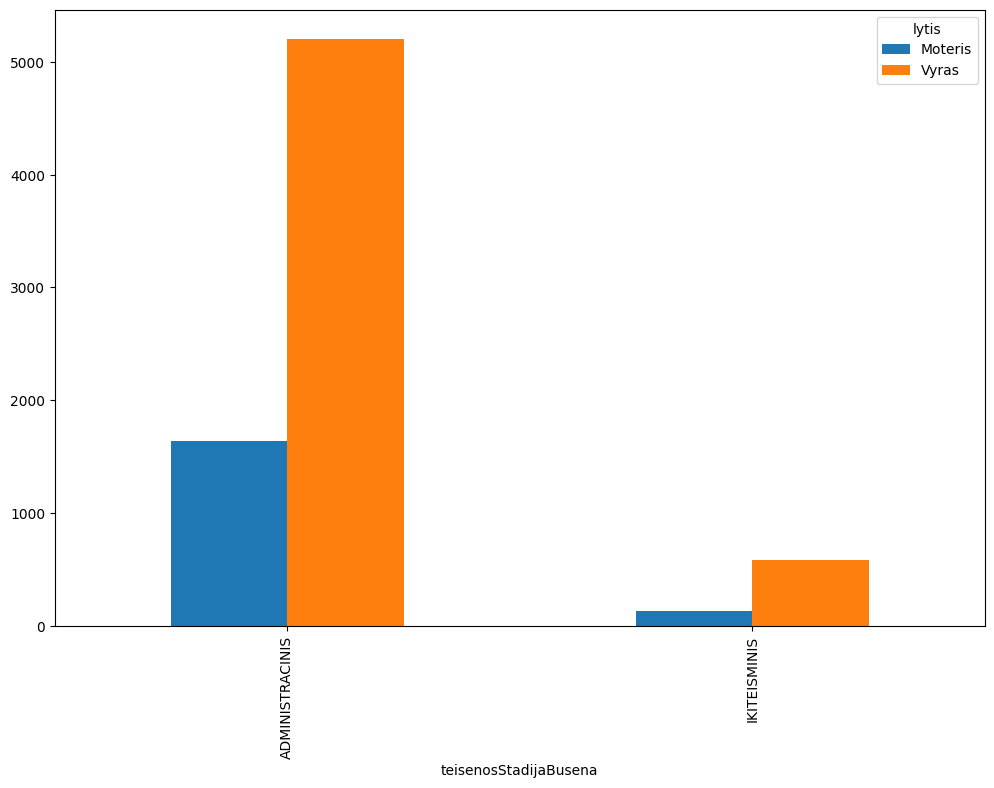

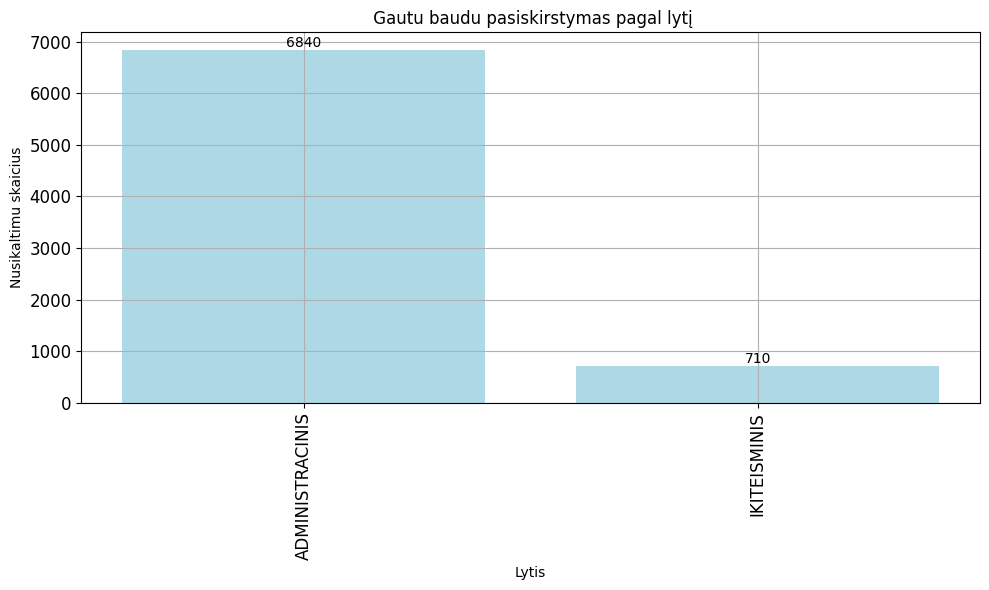

In [24]:
# Kokiomis baudų rūšimis buvo nubausti vyrai/moterys (administracinė, baudžiamoji)
# (teisenosStadijaBusena)
import pandas as pd
import matplotlib.pyplot as plt

# 1. Nuskaitykite JSON failą
file_path = r'C:\Users\eleta\OneDrive\Desktop\Mokslai\DataScienceNotebooks\Studentai\EleTame\ei_2023_12_31.json'
df = pd.read_json(file_path)

# 2. Sukuriame pagalbinę funkciją, kad ištrauktume lyties informaciją
def extract_sex(eismo_dalyviai):
    if isinstance(eismo_dalyviai, list) and len(eismo_dalyviai) > 0:
        return eismo_dalyviai[0].get('lytis', None)  # Ištraukiame lytį iš pirmo eismo dalyvio
    return None

# 3. Pridedame naują stulpelį 'lytis', kuriame yra lyties informacija
df['lytis'] = df['eismoDalyviai'].apply(extract_sex)

# 4. Pašalinkime įrašus, kurie neturi lyties informacijos
df = df.dropna(subset=['lytis'])

# 5. Grupavimas pagal lytį, kad būtų galima suskaičiuoti įvykių skaičių
sex_counts = df.groupby('lytis').size()
# 2. Sukuriame pagalbinę funkciją, kad ištrauktume baudos informaciją
def extract_bauda(eismo_dalyviai):
    if isinstance(eismo_dalyviai, list) and len(eismo_dalyviai) > 0:
        return eismo_dalyviai[0].get('teisenosStadijaBusena', None)  # Ištraukiame nusizengimo pobudi iš pirmo eismo dalyvio
    return None

# 3. Pridedame naują stulpelį 'Bauda', kuriame yra nusizengimo informacija
df['teisenosStadijaBusena'] = df['eismoDalyviai'].apply(extract_bauda)

# 4. Pašalinkime įrašus, kurie neturi nusizengimo informacijos
df = df.dropna(subset=['teisenosStadijaBusena'])

# 5. Grupavimas pagal teisenos stadijas, kad būtų galima suskaičiuoti įvykių skaičių
sex_counts = df.groupby('teisenosStadijaBusena').size()

# 8. Grupavimas pagal lytį ir valandą, kad būtų galima suskaičiuoti įvykius
grouped = df.groupby(['lytis', 'teisenosStadijaBusena']).size().unstack()

# 9. Braižome grafiką
grouped.T.plot(kind='bar', figsize=(12, 8))

plt.figure(figsize=(10, 6))
bars = plt.bar(sex_counts.index, sex_counts.values, color='lightblue')
plt.xlabel('Lytis')
plt.ylabel('Nusikaltimu skaicius')
plt.title(' Gautu baudu pasiskirstymas pagal lytį')
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.grid(True)

# Pridėti skaičius virš barų
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), 
             ha='center', va='bottom', fontsize=10)

# Parodome grafiką
plt.tight_layout()
plt.show()

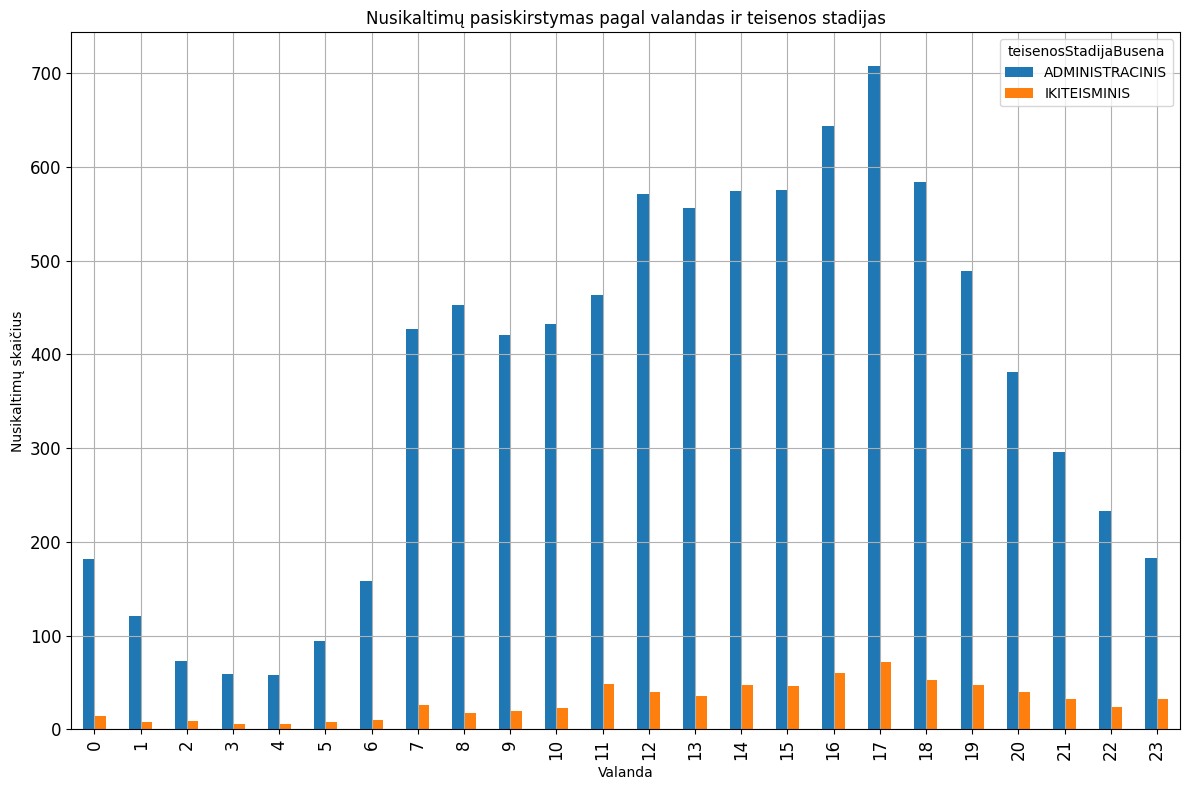

In [7]:
# Kokiomis valandomis padaryta nusizemgimai pagal savo sunkumo pobudi
# (teisenosStadijaBusena)
import pandas as pd
import matplotlib.pyplot as plt

# 1. Nuskaitykite JSON failą
file_path = r'C:\Users\eleta\OneDrive\Desktop\Mokslai\DataScienceNotebooks\Studentai\EleTame\ei_2023_12_31.json'
df = pd.read_json(file_path)

# 2. Konvertuokite stulpelį 'dataLaikas' į datetime formatą
df['dataLaikas'] = pd.to_datetime(df['dataLaikas'], errors='coerce')

# 3. Pašalinkime įrašus, kurie neturi laiko informacijos (tik datą)
df = df.dropna(subset=['dataLaikas'])  # Pašaliname NaT reikšmes

# 4. Išskirkite tik valandos dalį ir pridėkite naują stulpelį 'valanda'
df['valanda'] = df['dataLaikas'].dt.hour

# 5. Sukuriame pagalbinę funkciją, kad ištrauktume baudos informaciją
def extract_bauda(eismo_dalyviai):
    if isinstance(eismo_dalyviai, list) and len(eismo_dalyviai) > 0:
        return eismo_dalyviai[0].get('teisenosStadijaBusena', None)  # Ištraukiame nusizengimo pobudi iš pirmo eismo dalyvio
    return None

# 6. Pridedame naują stulpelį 'teisenosStadijaBusena', kuriame yra nusizengimo informacija
df['teisenosStadijaBusena'] = df['eismoDalyviai'].apply(extract_bauda)

# 7. Pašalinkime įrašus, kurie neturi nusizengimo informacijos
df = df.dropna(subset=['teisenosStadijaBusena'])

# 8. Grupavimas pagal valandą ir teisenos stadiją, kad būtų galima suskaičiuoti įvykius
grouped = df.groupby(['valanda', 'teisenosStadijaBusena']).size().unstack()

# 9. Braižome grafikus
grouped.plot(kind='bar', stacked=False, figsize=(12, 8))#stacked=True - braizys grafikus vienas ant kito.

plt.xlabel('Valanda')
plt.ylabel('Nusikaltimų skaičius')
plt.title('Nusikaltimų pasiskirstymas pagal valandas ir teisenos stadijas')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Parodome grafiką
plt.tight_layout()
plt.show()

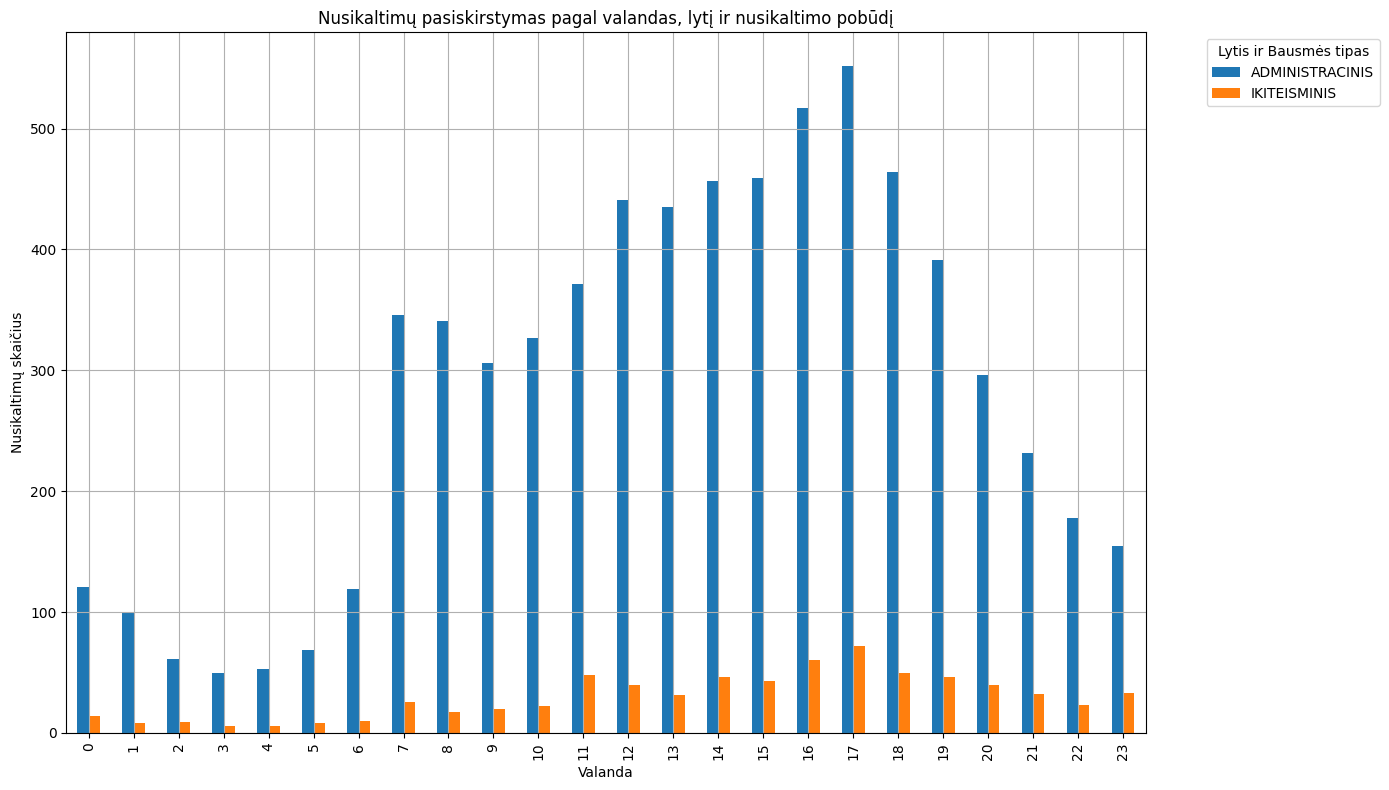

In [14]:
# Kokiomis valandomis padaryta nusizemgimai pagal savo sunkumo pobudi
# (teisenosStadijaBusena) ir kas ju daugiau padaro: vyrai ar moterys

#KODEL NESUVEIKIA? NETSKIRIA KOKIA VALANDA KIEK KOKIU NUSIZENGIMU PADARE 
# MOTERYS< O KIEK VYRAI? Atskiriau, kai surasiau visus parametrus i vienus skliaustus...
import pandas as pd
import matplotlib.pyplot as plt

# 1. Nuskaitykite JSON failą
file_path = r'C:\Users\eleta\OneDrive\Desktop\Mokslai\DataScienceNotebooks\Studentai\EleTame\ei_2023_12_31.json'
df = pd.read_json(file_path)

# 2. Konvertuokite stulpelį 'dataLaikas' į datetime formatą
df['dataLaikas'] = pd.to_datetime(df['dataLaikas'], errors='coerce')

# 3. Pašalinkime įrašus, kurie neturi laiko informacijos (tik datą)
df = df.dropna(subset=['dataLaikas'])  # Pašaliname NaT reikšmes

# 4. Išskirkite tik valandos dalį ir pridėkite naują stulpelį 'valanda'
df['valanda'] = df['dataLaikas'].dt.hour

# 5. Sukuriame pagalbinę funkciją, kad ištrauktume baudos informaciją
def extract_bauda(eismo_dalyviai):
    if isinstance(eismo_dalyviai, list) and len(eismo_dalyviai) > 0:
        return eismo_dalyviai[0].get('teisenosStadijaBusena', None)  # Ištraukiame nusizengimo pobudi iš pirmo eismo dalyvio
    return None

# 6. Pridedame naują stulpelį 'teisenosStadijaBusena', kuriame yra nusizengimo informacija
df['teisenosStadijaBusena'] = df['eismoDalyviai'].apply(extract_bauda)

# 7. Pašalinkime įrašus, kurie neturi nusizengimo informacijos
df = df.dropna(subset=['teisenosStadijaBusena'])

# 8. Sukuriame pagalbinę funkciją, kad ištrauktume lyties informaciją
def extract_sex(eismo_dalyviai):
    if isinstance(eismo_dalyviai, list) and len(eismo_dalyviai) > 0:
        return eismo_dalyviai[0].get('lytis', None)  # Ištraukiame lytį iš pirmo eismo dalyvio
    return None

# 9. Pridedame naują stulpelį 'lytis', kuriame yra lyties informacija
df['lytis'] = df['eismoDalyviai'].apply(extract_sex)

# 10. Pašalinkime įrašus, kurie neturi lyties informacijos
df = df.dropna(subset=['lytis'])

# 12. Grupavimas pagal valandą, lytį ir nusikaltimo pobūdį
grouped = df.groupby(['valanda', 'teisenosStadijaBusena'])['lytis'].size().unstack()

# 14. Braižome grafikus
grouped.plot(kind='bar', stacked=False, figsize=(14, 8))

# 15. Pasukame X ašies įrašus 90 laipsnių kampu
plt.xticks(rotation=90)

# 16. Grafiko nustatymai
plt.xlabel('Valanda')
plt.ylabel('Nusikaltimų skaičius')
plt.title('Nusikaltimų pasiskirstymas pagal valandas, lytį ir nusikaltimo pobūdį')
plt.legend(title='Lytis ir Bausmės tipas', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Parodome grafiką
plt.tight_layout()
plt.show()


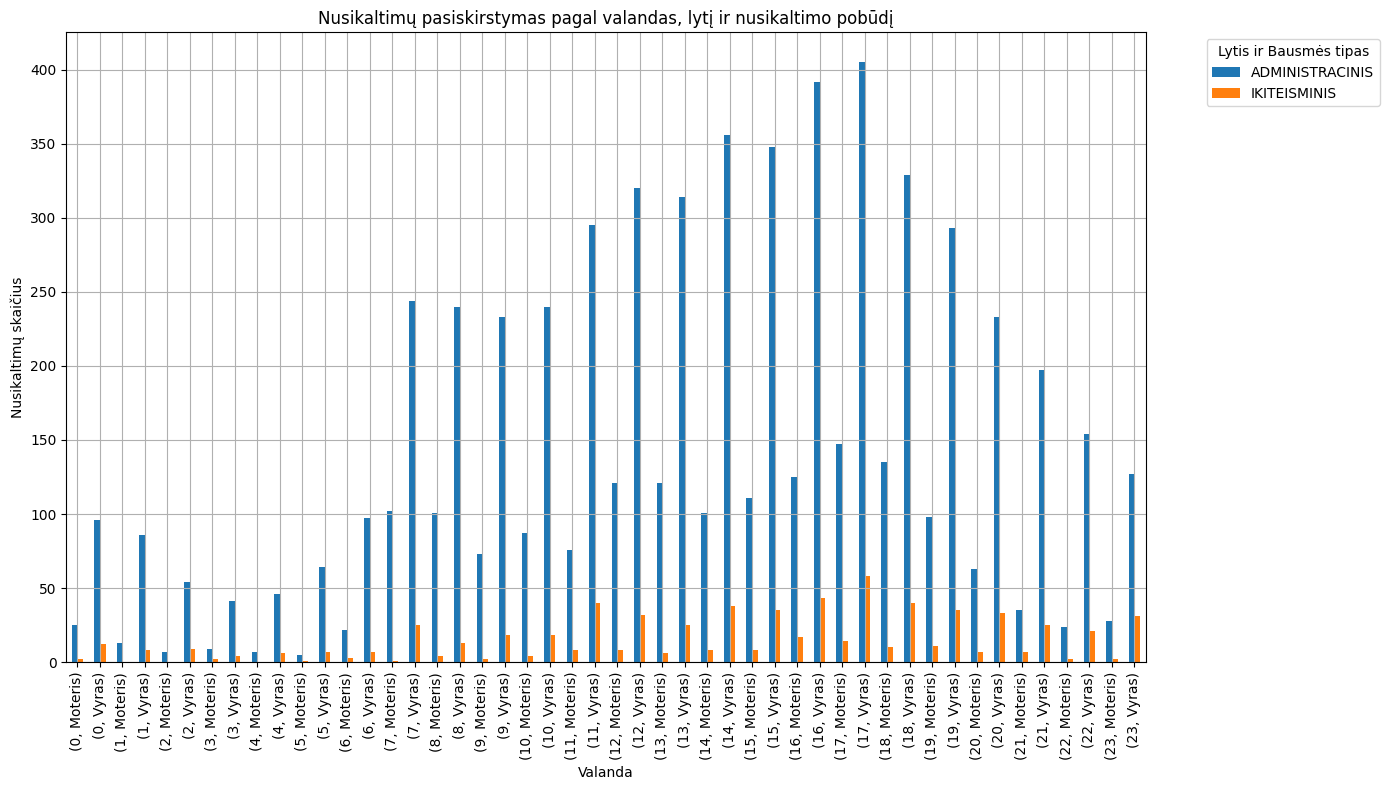

In [19]:
# Kokiomis valandomis padaryta nusizemgimai pagal savo sunkumo pobudi
# (teisenosStadijaBusena) ir kas ju daugiau padaro: vyrai ar moterys

#KODEL NESUVEIKIA grouped = df.groupby(['valanda', 'lytis'])(['teisenosStadijaBusena']).size().unstack()?
# NETSKIRAI KOKIA VALANDA KIEK KOKIU NUSIZENGIMU PADARE MOTERYS< O KIEK VYRAI?
#SuveikIA 
#KODEL NESUVEIKIA grouped = df.groupby(['valanda', 'lytis','teisenosStadijaBusena']).size().unstack()
import pandas as pd
import matplotlib.pyplot as plt

# 1. Nuskaitykite JSON failą
file_path = r'C:\Users\eleta\OneDrive\Desktop\Mokslai\DataScienceNotebooks\Studentai\EleTame\ei_2023_12_31.json'
df = pd.read_json(file_path)

# 2. Konvertuokite stulpelį 'dataLaikas' į datetime formatą
df['dataLaikas'] = pd.to_datetime(df['dataLaikas'], errors='coerce')

# 3. Pašalinkime įrašus, kurie neturi laiko informacijos (tik datą)
df = df.dropna(subset=['dataLaikas'])  # Pašaliname NaT reikšmes

# 4. Išskirkite tik valandos dalį ir pridėkite naują stulpelį 'valanda'
df['valanda'] = df['dataLaikas'].dt.hour

# 5. Sukuriame pagalbinę funkciją, kad ištrauktume baudos informaciją
def extract_bauda(eismo_dalyviai):
    if isinstance(eismo_dalyviai, list) and len(eismo_dalyviai) > 0:
        return eismo_dalyviai[0].get('teisenosStadijaBusena', None)  # Ištraukiame nusizengimo pobudi iš pirmo eismo dalyvio
    return None

# 6. Pridedame naują stulpelį 'teisenosStadijaBusena', kuriame yra nusizengimo informacija
df['teisenosStadijaBusena'] = df['eismoDalyviai'].apply(extract_bauda)

# 7. Pašalinkime įrašus, kurie neturi nusizengimo informacijos
df = df.dropna(subset=['teisenosStadijaBusena'])

# 8. Sukuriame pagalbinę funkciją, kad ištrauktume lyties informaciją
def extract_sex(eismo_dalyviai):
    if isinstance(eismo_dalyviai, list) and len(eismo_dalyviai) > 0:
        return eismo_dalyviai[0].get('lytis', None)  # Ištraukiame lytį iš pirmo eismo dalyvio
    return None

# 9. Pridedame naują stulpelį 'lytis', kuriame yra lyties informacija
df['lytis'] = df['eismoDalyviai'].apply(extract_sex)

# 10. Pašalinkime įrašus, kurie neturi lyties informacijos
df = df.dropna(subset=['lytis'])

# 12. Grupavimas pagal valandą, lytį ir nusikaltimo pobūdį
grouped = df.groupby(['valanda', 'lytis','teisenosStadijaBusena']).size().unstack()

# 14. Braižome grafikus
grouped.plot(kind='bar', stacked=False, figsize=(14, 8))

# 15. Pasukame X ašies įrašus 90 laipsnių kampu
plt.xticks(rotation=90)

# 16. Grafiko nustatymai
plt.xlabel('Valanda')
plt.ylabel('Nusikaltimų skaičius')
plt.title('Nusikaltimų pasiskirstymas pagal valandas, lytį ir nusikaltimo pobūdį')
plt.legend(title='Lytis ir Bausmės tipas', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Parodome grafiką
plt.tight_layout()
plt.show()